In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette("tab10")
colors_fit = sns.color_palette("dark")
sns.set_context("notebook")

In [23]:
EV_H2 = np.sqrt(abs(np.array(np.loadtxt("H2_eigenvalues.txt"))[:-400]))
EV_formal = np.sqrt(abs(np.array(np.loadtxt("formaldehyde_eigenvalues.txt"))[:-4000]))
EV_uracil = np.sqrt(abs(np.array(np.loadtxt("uracil_eigenvalues.txt"))[:-500]))

x_H2 = np.arange(len(EV_H2))
x_formal = np.arange(len(EV_formal))
x_uracil = np.arange(len(EV_uracil))

molecules = ['H2', 'formal', 'uracil']    

In [24]:
from scipy.optimize import curve_fit

def model_func(x, a, b, c):
    return a * np.exp(-b * x ** c) 


p = [51.0282, 0.755229, 0.336993]

# $H_2$

Fitted parameters for H2: a=8.310508927492453, b=0.8624339859954797, c=0.3272242890331393


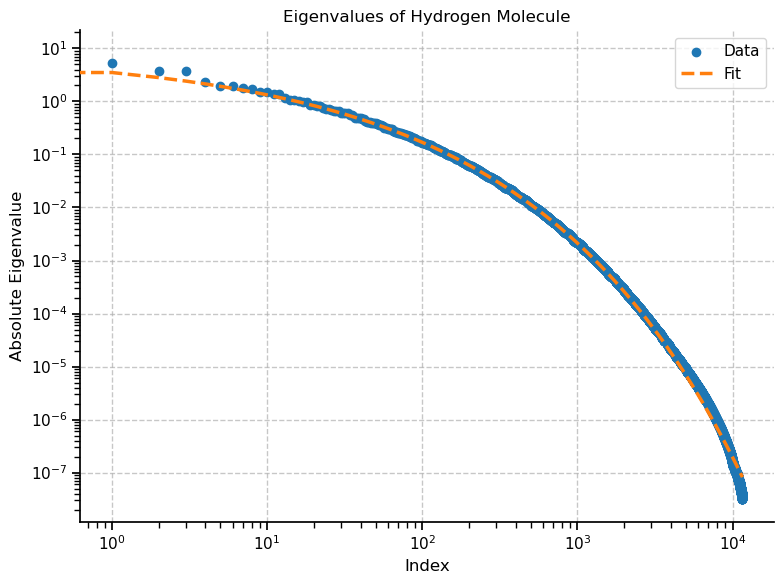

In [25]:
params_H2, _ = curve_fit(model_func, x_H2[90:], EV_H2[90:], p0=p)
print(f"Fitted parameters for H2: a={params_H2[0]}, b={params_H2[1]}, c={params_H2[2]}")

plt.figure(figsize=(8, 6))
plt.scatter(x_H2, EV_H2, label='Data', color=colors[0], zorder=10)
plt.plot(x_H2, model_func(x_H2, *params_H2), label='Fit', color=colors[1], linestyle='--', zorder=20, linewidth=2.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Index')
plt.ylabel('Absolute Eigenvalue')
plt.grid(ls ='--', alpha=0.7,zorder=1)
plt.title('Eigenvalues of Hydrogen Molecule')
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

# Uracil

Fitted parameters for Uracil: [34.39875072  0.32439069  0.40287325]


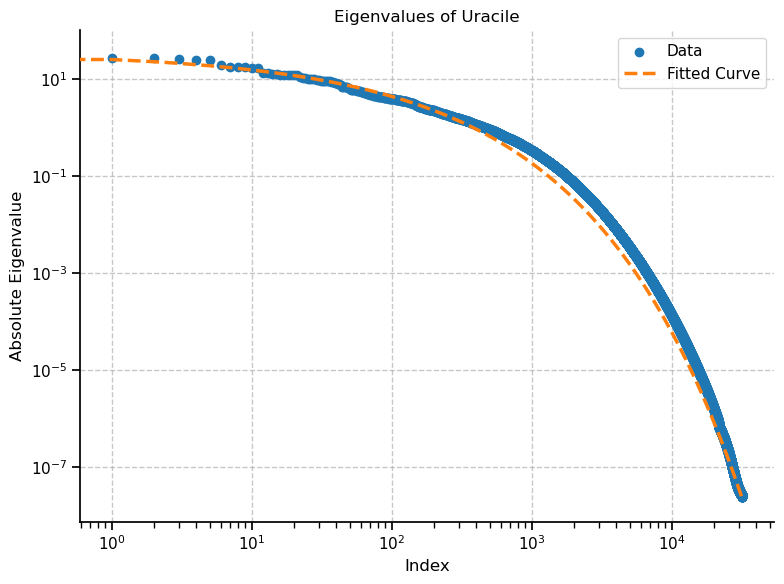

In [26]:
weights = 1 / (EV_uracil)
params_uracil, _ = curve_fit(model_func, x_uracil, EV_uracil, p0=p)
print("Fitted parameters for Uracil:", params_uracil)

plt.figure(figsize=(8, 6))
plt.scatter(x_uracil, EV_uracil, label='Data', color=colors[0], zorder=10)
plt.plot(x_uracil, model_func(x_uracil, *params_uracil), color=colors[1], linestyle='--', label='Fitted Curve', zorder=20,  linewidth=2.5)
# plt.plot(x_uracil, model_func(x_uracil, *p), color=colors[2], linestyle=':', label='Initial Guess')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Index')
plt.ylabel('Absolute Eigenvalue')
plt.grid(ls ='--', alpha=0.7,zorder=1)
plt.title('Eigenvalues of Uracile')
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()

# Formaldehyde

Parameters Formaldehyde: [51.0282, 0.755229, 0.336993]


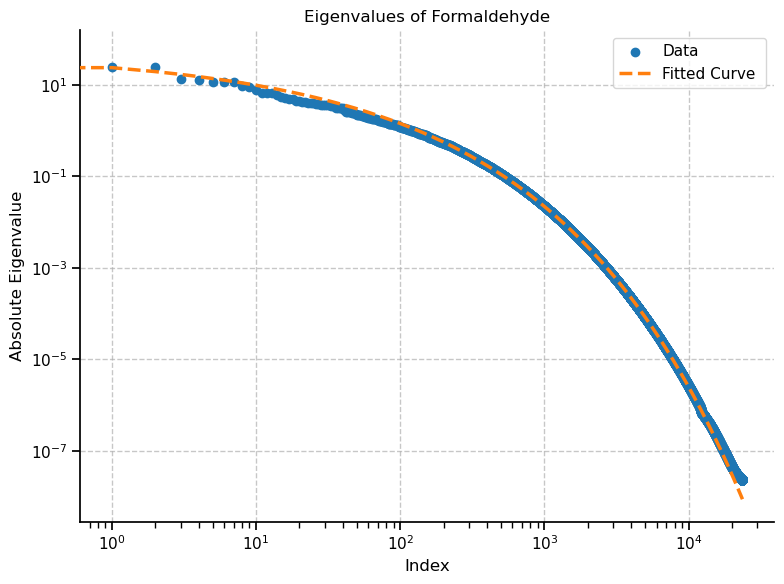

In [27]:
print("Parameters Formaldehyde:", p)
plt.figure(figsize=(8, 6))
plt.scatter(x_formal, EV_formal, label='Data', color=colors[0], zorder=10)
plt.plot(x_formal, model_func(x_formal, *p), color=colors[1], linestyle='--', label='Fitted Curve ', zorder=20, linewidth=2.5)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Index')
plt.ylabel('Absolute Eigenvalue')
plt.grid(ls ='--', alpha=0.7,zorder=1)
# plt.text(0.05, 10e-3, 
#          r'$f(x) = {:.2f} \exp(-{:.2f} x^{{{:.2f}}})$'.format(*p), 
#          transform=plt.gca().transAxes, fontsize=12, color=colors[3])
plt.title('Eigenvalues of Formaldehyde')
sns.despine()
plt.legend()
plt.tight_layout()
plt.show()


# comparison of all fits

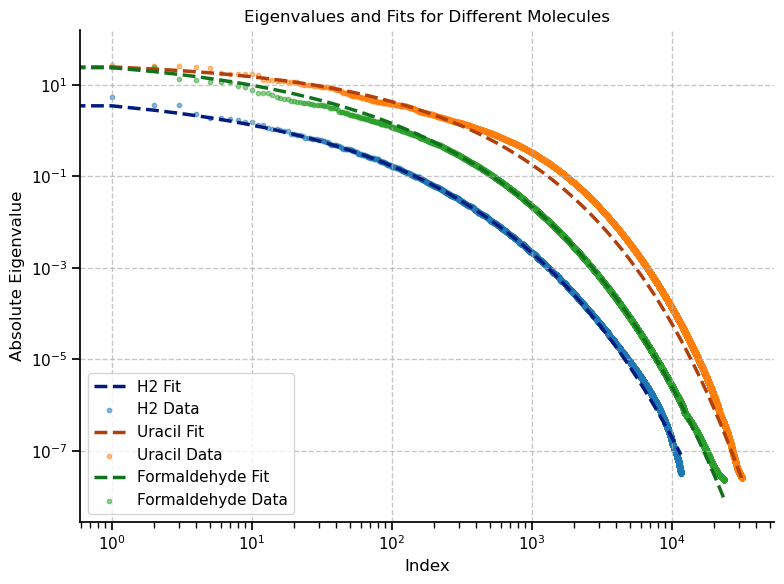

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(x_H2, model_func(x_H2, *params_H2), label='H2 Fit', color=colors_fit[0], linestyle='--', linewidth=2.5)
plt.scatter(x_H2, EV_H2, label='H2 Data', color=colors[0], s=10, alpha=0.5)
plt.plot(x_uracil, model_func(x_uracil, *params_uracil), label='Uracil Fit', color=colors_fit[1], linestyle='--', linewidth=2.5)
plt.scatter(x_uracil, EV_uracil, label='Uracil Data', color=colors[1], s=10, alpha=0.5)
plt.plot(x_formal, model_func(x_formal, *p), label='Formaldehyde Fit', color=colors_fit[2], linestyle='--', linewidth=2.5)
plt.scatter(x_formal, EV_formal, label='Formaldehyde Data', color=colors[2], s=10, alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Absolute Eigenvalue')
plt.grid(ls ='--', alpha=0.7,zorder=1)
plt.title('Eigenvalues and Fits for Different Molecules')
plt.xscale("log")
plt.yscale("log")
sns.despine()
plt.legend()
plt.tight_layout()
plt.savefig("fits_EV.pdf")
plt.show()